# 6.3 (central limit theorem)

In [ ]:
using LinearAlgebra
using Plots
using Colors
using Statistics
using Polynomials
gr()
set = Float64[5, 10, 100, 1000]

function that generates $N'$ random numbers in an array by using the sum of $N$ randomly chosen numbers from set $({5, 10, 100, 1000})$ 

In [ ]:
function randomGen(Nprime, N, set)
    Y = []
    for j in 1:Nprime
    summedNumber = 0
        for i in 1:N
            num = rand(1:Int(length(set)))
            summedNumber += set[num]
        end
    push!(Y, summedNumber / N)
    end
    return Y
end

Plotting the histogram of the distribution

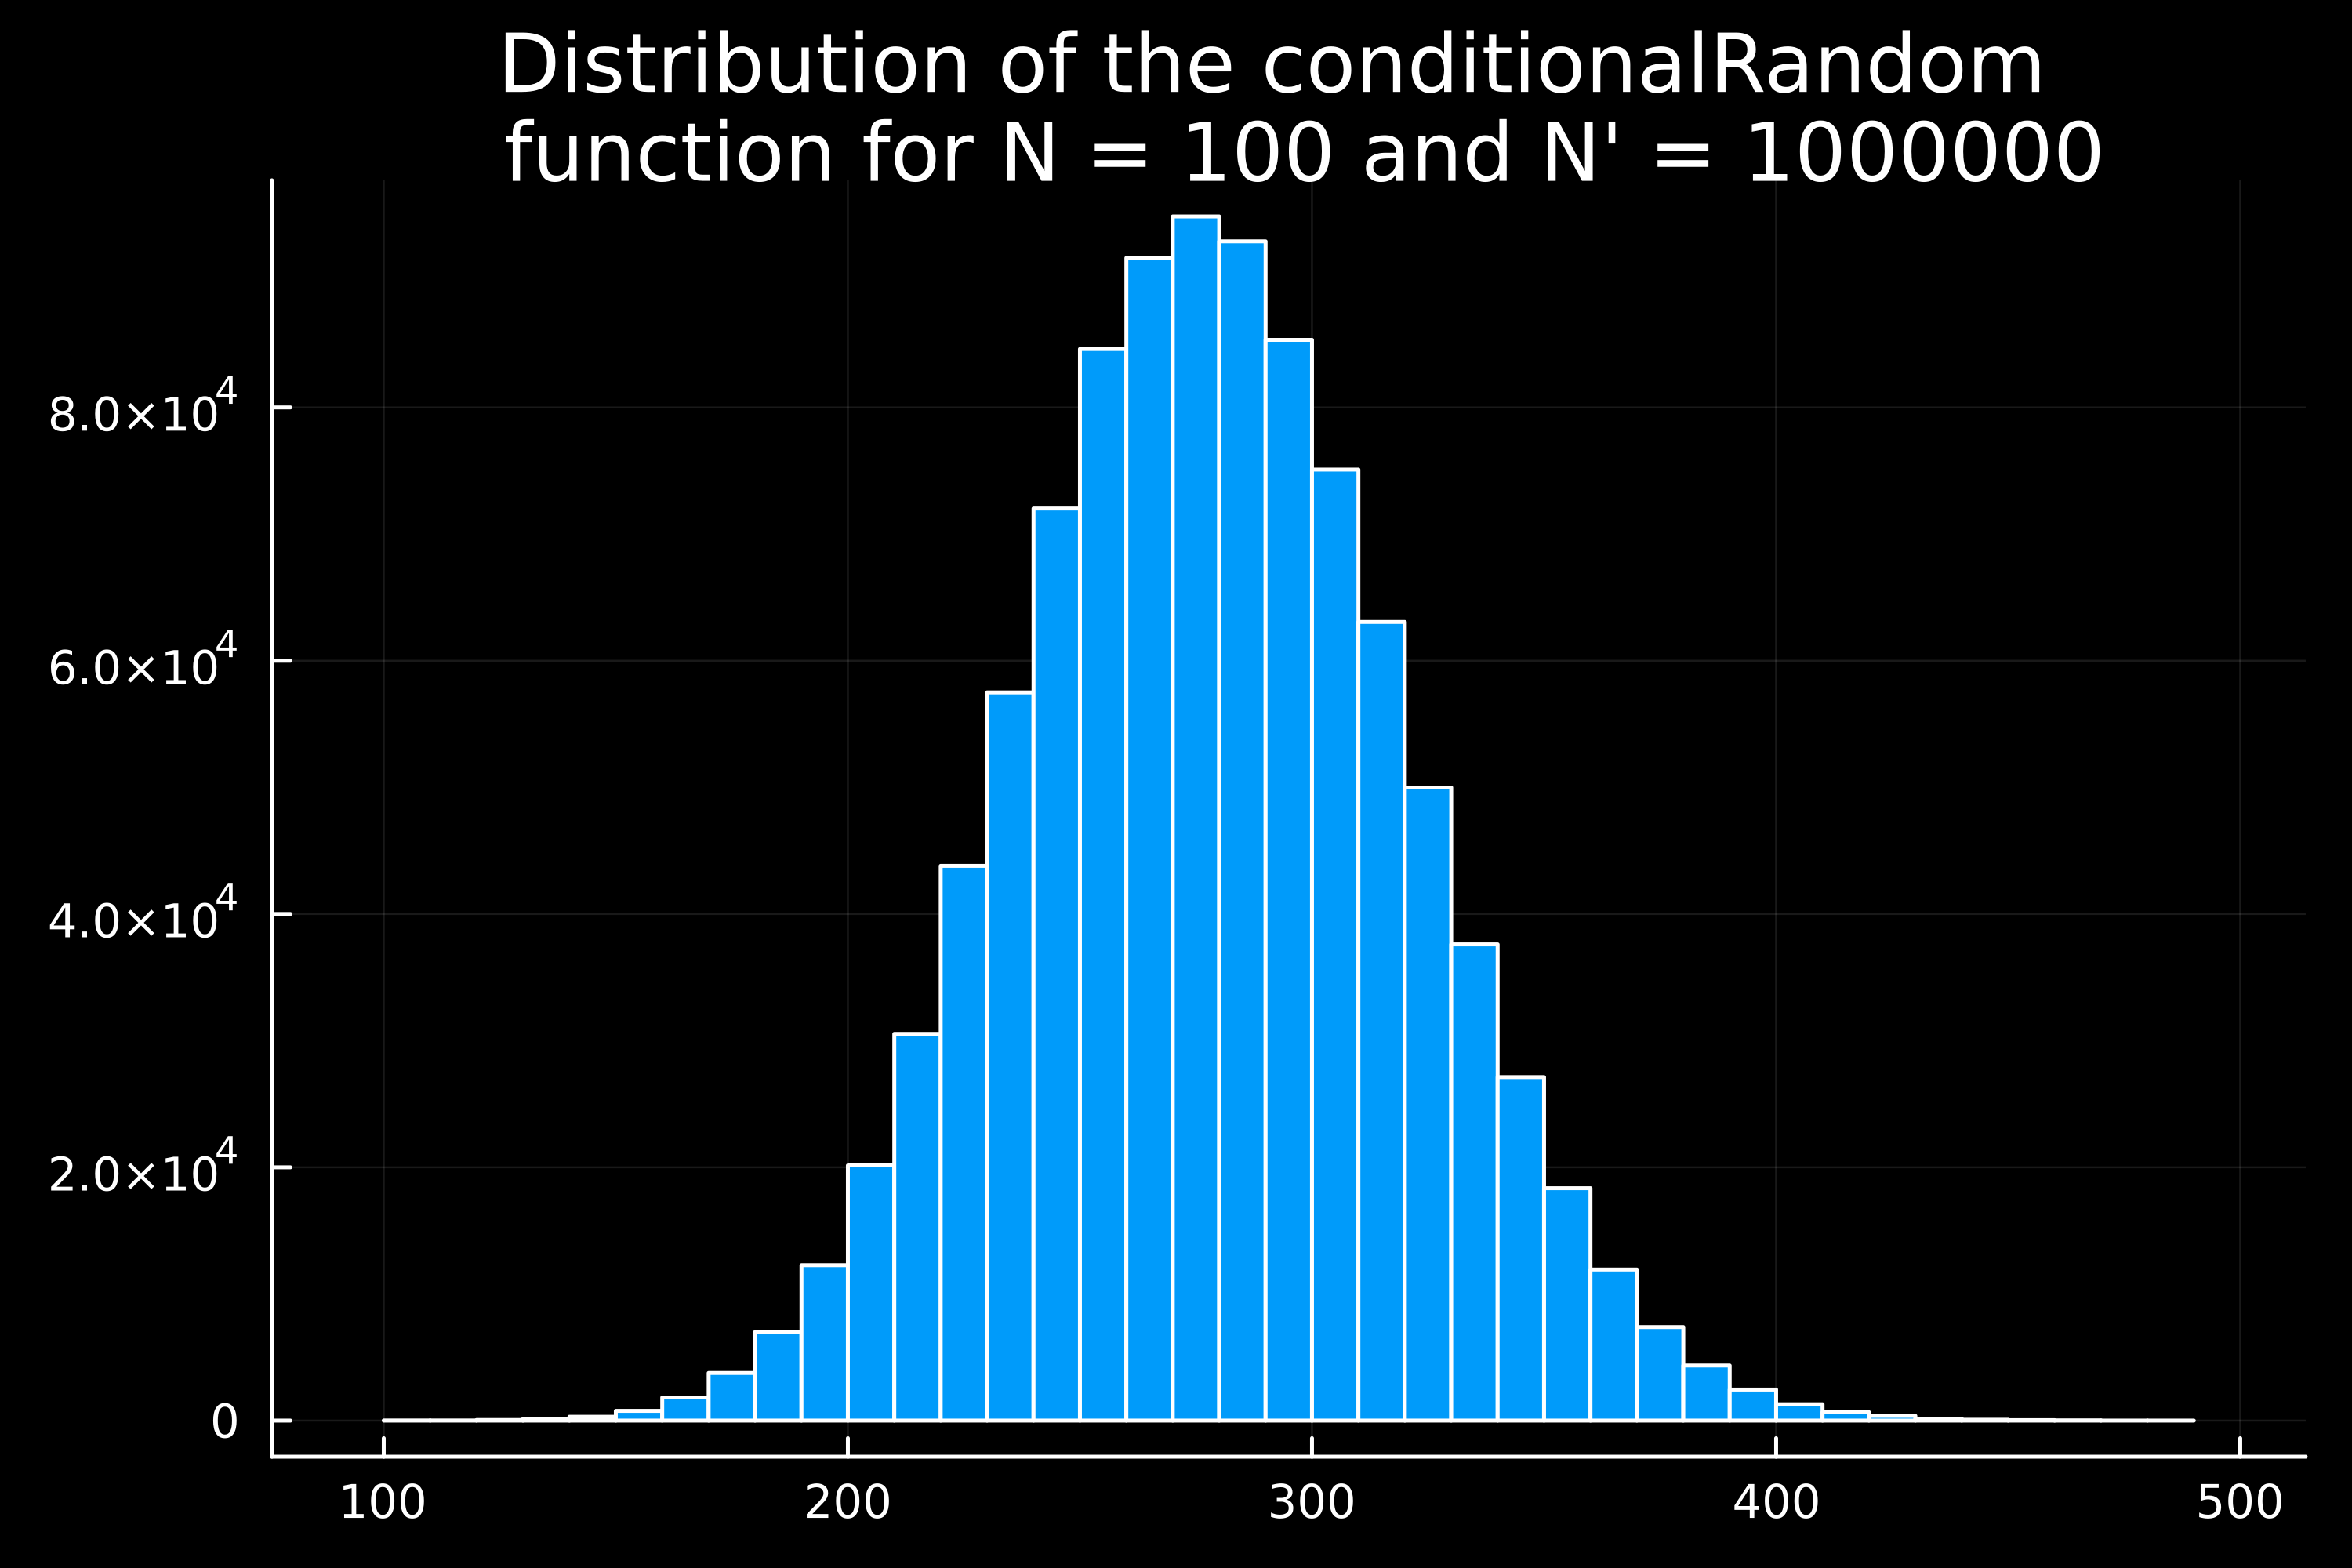

In [20]:
N = 100
Nprime = 1000000
randomNumber = randomGen(Nprime, N, set)
histogram(randomNumber, title = "Distribution of the conditionalRandom \n function for N = $N and N' = $Nprime", background = :black, legend = false, dpi = 500,
bins = 60)

Now we will calculate the values of $<x>$ and $\sigma_x$ to calculate the values of $<y>$ and $\sigma_y$ so we can fit a gaussian curve to the histogram.

In [ ]:
xbracket = sum(set) / length(set)
sigmax = sum(dot(set, set)) / length(set) - xbracket^2 #this is equal to sigma^2
ybracket = xbracket
sigmay = sigmax / N #this is equal to sigma^2
p(x) = 1 / sqrt(2 * pi * sigmay) * exp(-1 * (x - ybracket)^2 / (2 * sigmay))

Plotting the histogram again but this time we also have the theoretical value on top.

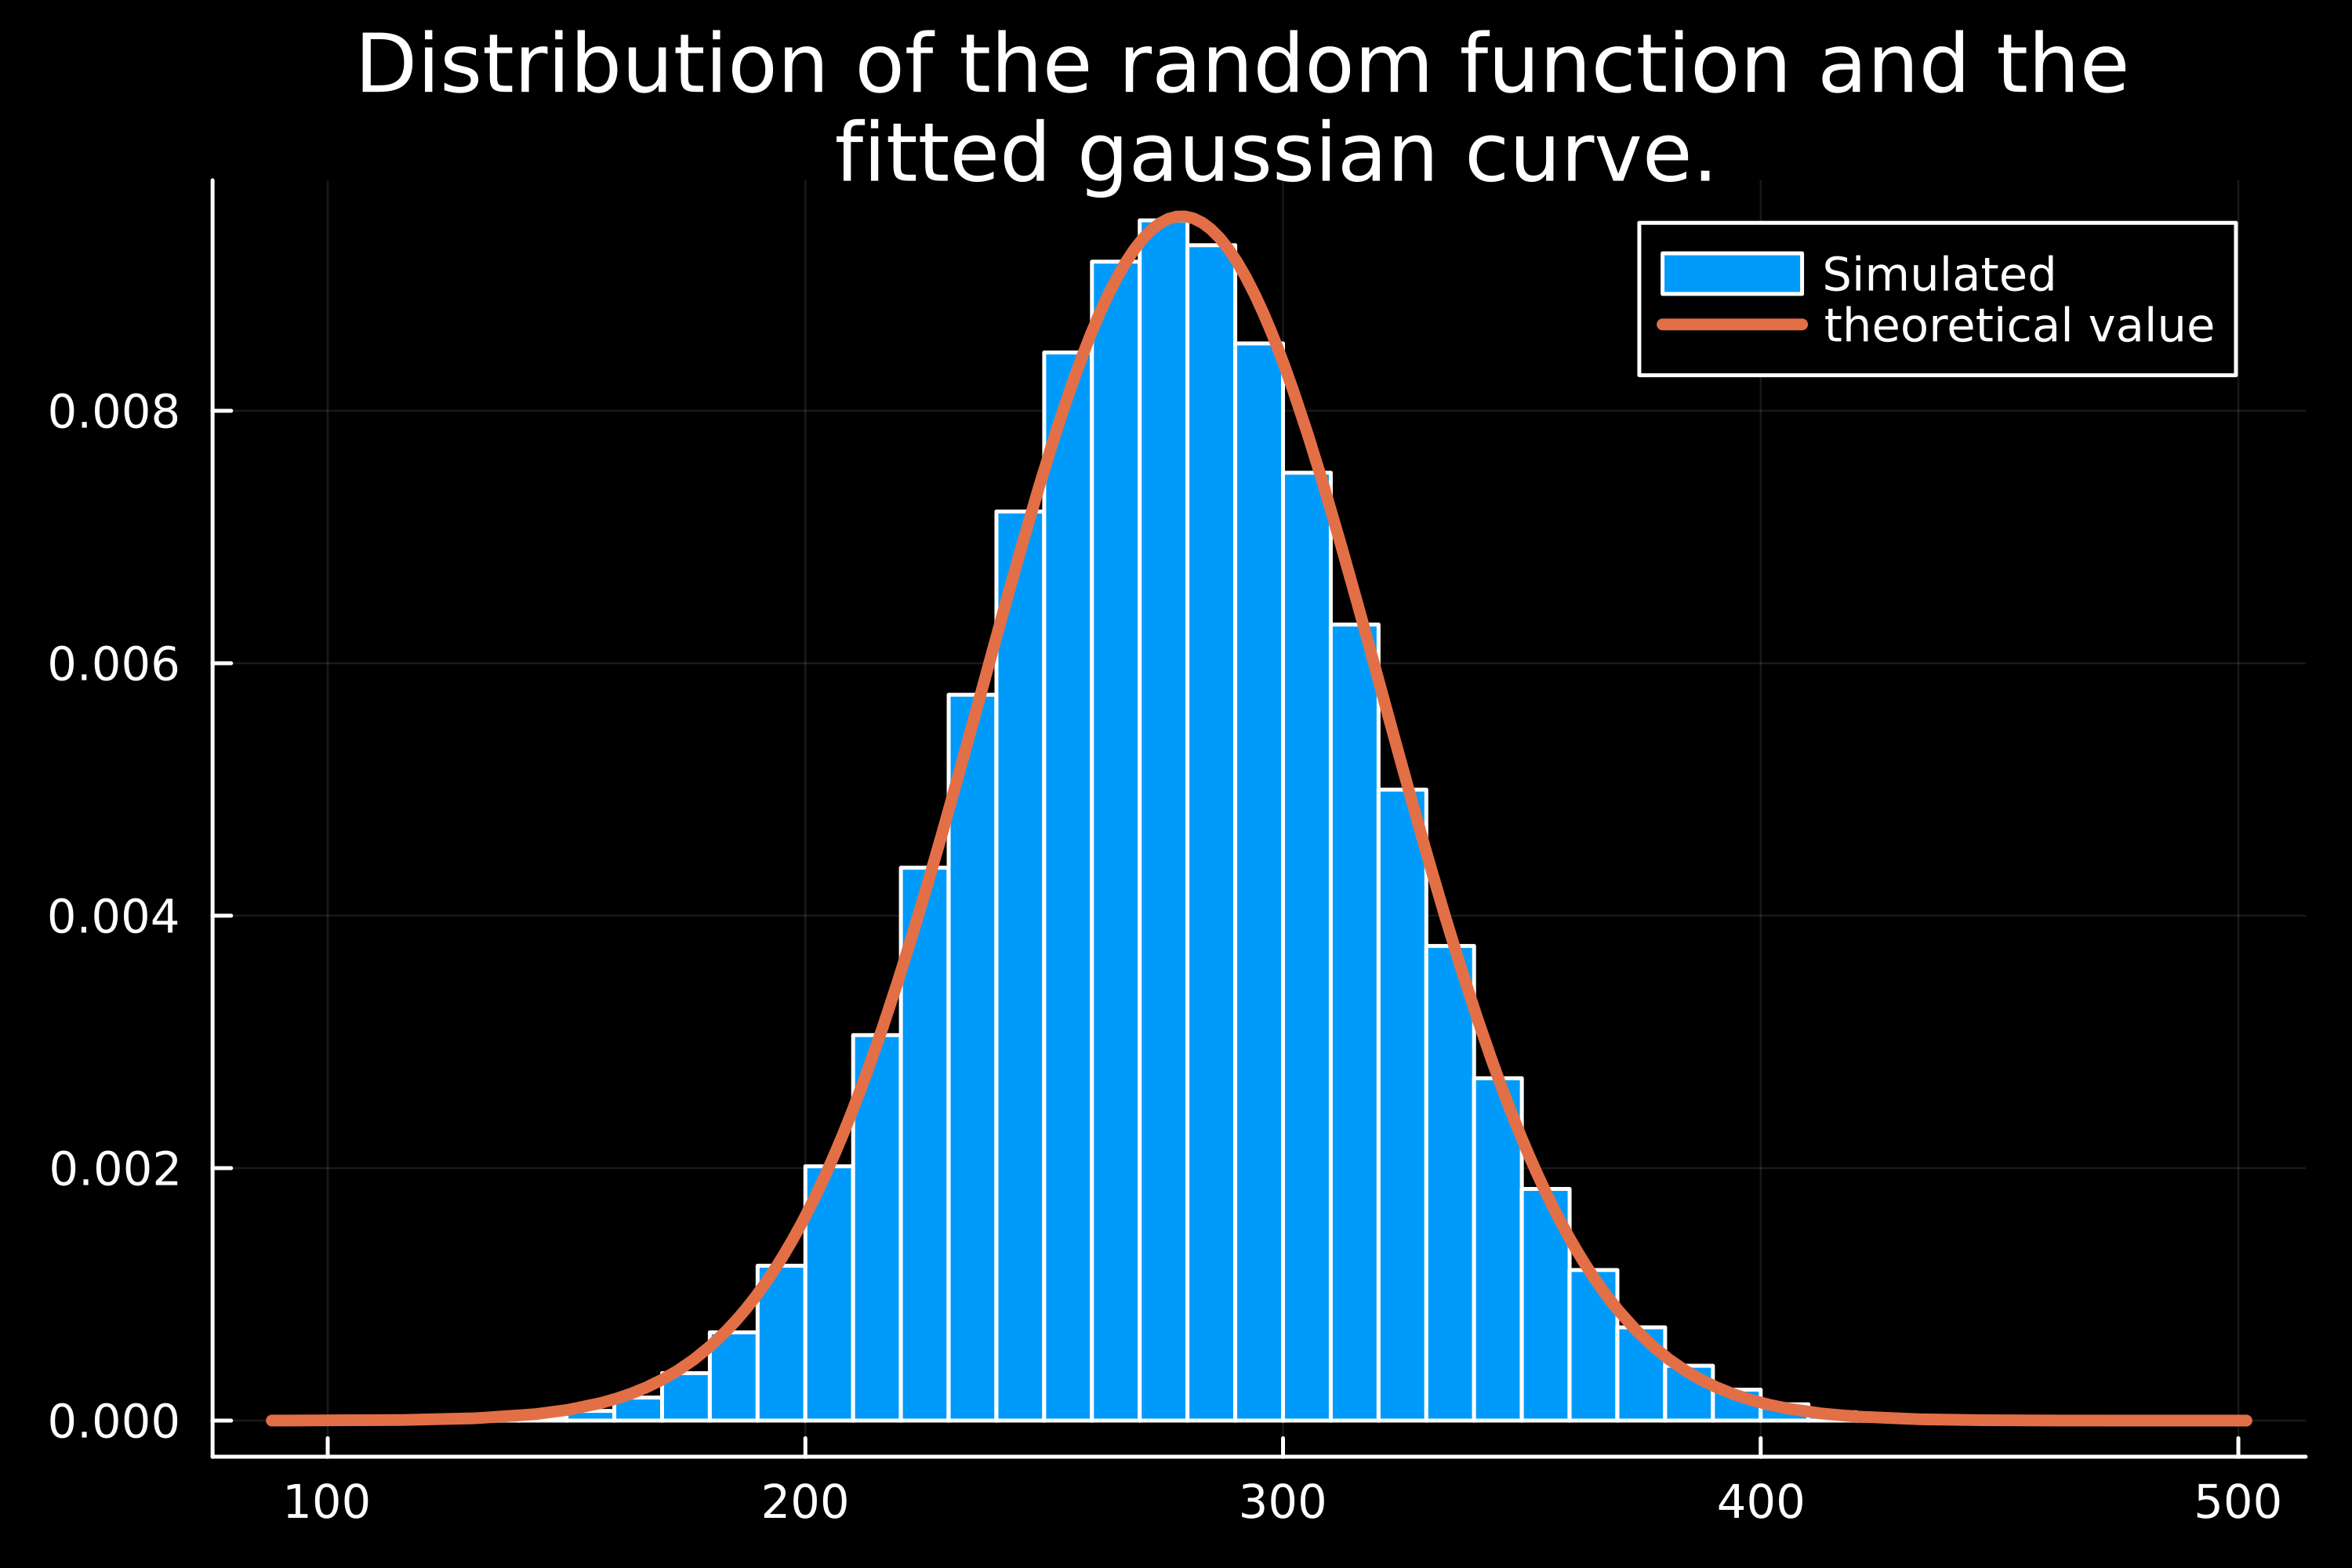

In [61]:
histogram(randomNumber, title = "Distribution of the random function and the \n fitted gaussian curve.", background = :black, dpi = 500,
bins = 70, label = "Simulated", normalize=:pdf)
plot!(p, label = "theoretical value", lw = 3)